In [1]:
import pandas as pd

In [2]:
hous = pd.read_csv('USA_Housing.csv')

In [3]:
hous.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
hous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
hous.drop('Address',axis=1,inplace=True)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

No handles with labels found to put in legend.


<Figure size 864x504 with 0 Axes>

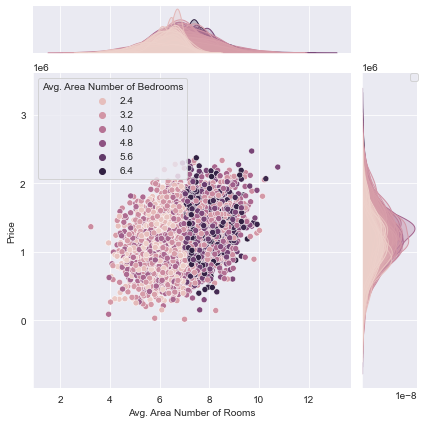

In [7]:
plt.figure(figsize=(12,7))
sns.jointplot(x='Avg. Area Number of Rooms',y='Price',
             data=hous,hue='Avg. Area Number of Bedrooms')

plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()

In [8]:
hous.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = hous.drop('Price',axis=1)

y = hous['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lnn = LinearRegression()

In [13]:
lnn.fit(X_train,y_train)

LinearRegression()

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
prediction = lnn.predict(X_test)

In [16]:
print(lnn.intercept_)

-2638673.426190582


In [17]:
lnn.coef_

array([2.16257989e+01, 1.65590393e+05, 1.19827783e+05, 2.36109526e+03,
       1.52165814e+01])

In [18]:
pd.DataFrame(lnn.coef_,X_train.columns,columns=['Coeff'])

,Coeff
Avg. Area Income,21.625799
Avg. Area House Age,165590.392746
Avg. Area Number of Rooms,119827.783390
Avg. Area Number of Bedrooms,2361.095262
Area Population,15.216581


In [19]:
#LOGISTIC REGRESSION

In [20]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
del train['Name']

<AxesSubplot:>

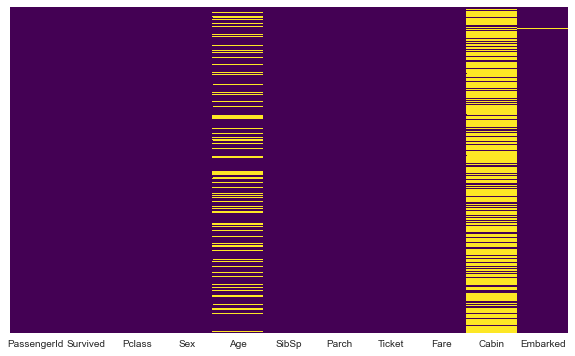

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

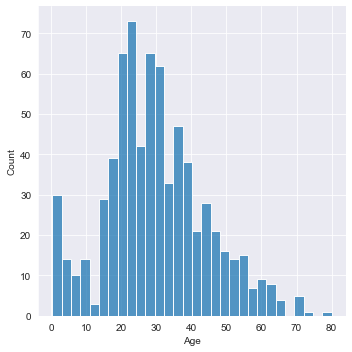

In [24]:
sns.displot(x=train['Age'].dropna(),bins=30)

In [25]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

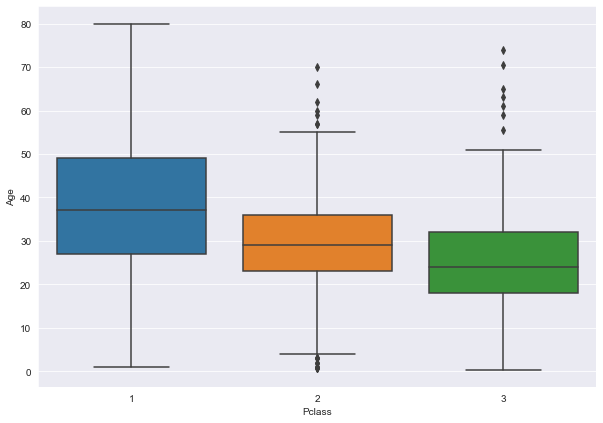

In [26]:
plt.figure(figsize=(10,7))
sns.boxplot(x=train['Pclass'],y=train['Age'])

In [1]:
#JUST TESTING TRAIN TEST SPLIT

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
del data['Cabin']

In [7]:
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [9]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [10]:
data['Sex'] = data['Sex'].map({'male':0,'female':1})

In [12]:
del data['Name']
del data['Ticket']

In [13]:
data.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S


In [18]:
data['Embarked'] = data['Embarked'].map({'S':0,'C':1,'Q':2})

In [19]:
data.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0


In [20]:
from sklearn.model_selection import train_test_split

In [56]:
X = data.drop('Survived', axis=1)

y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [27]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
757,758,2,0,18.00,0,0,11.5000,0
310,311,1,1,24.00,0,0,83.1583,1
469,470,3,1,0.75,2,1,19.2583,1
331,332,1,0,45.50,0,0,28.5000,0
752,753,3,0,33.00,0,0,9.5000,0
...,...,...,...,...,...,...,...,...
98,99,2,1,34.00,0,1,23.0000,0
753,754,3,0,23.00,0,0,7.8958,0
724,725,1,0,27.00,1,0,53.1000,0
422,423,3,0,29.00,0,0,7.8750,0


In [28]:
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
225,226,3,0,22.0,0,0,9.3500,0
449,450,1,0,52.0,0,0,30.5000,0
750,751,2,1,4.0,1,1,23.0000,0
261,262,3,0,3.0,4,2,31.3875,0
283,284,3,0,19.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
252,253,1,0,62.0,0,0,26.5500,0
800,801,2,0,34.0,0,0,13.0000,0
374,375,3,1,3.0,3,1,21.0750,0
460,461,1,0,48.0,0,0,26.5500,0


In [29]:
y_train

757    0
310    1
469    1
331    0
752    0
      ..
98     1
753    0
724    1
422    0
663    0
Name: Survived, Length: 498, dtype: int64

In [30]:
y_test 

225    0
449    1
750    1
261    1
283    1
      ..
252    0
800    0
374    0
460    1
195    1
Name: Survived, Length: 214, dtype: int64

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logreg = LogisticRegression()

In [33]:
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
prediction = logreg.predict(X_test)

In [37]:
prediction

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(classification_report(prediction,y_test))
print(confusion_matrix(prediction,y_test))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       134
           1       0.69      0.74      0.71        80

    accuracy                           0.78       214
   macro avg       0.76      0.77      0.76       214
weighted avg       0.78      0.78      0.78       214

[[107  27]
 [ 21  59]]


In [53]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(logreg, open(filename, 'wb'))

In [54]:
import pickle

In [58]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7757009345794392


In [40]:
test_data = pd.read_csv('titanic_test.csv')

In [41]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [42]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [43]:
test_data['Embarked'] = test_data['Embarked'].map({'S':0,'C':1,'Q':2})
test_data['Sex'] = test_data['Sex'].map({'male':0,'female':1})

In [45]:
del test_data['Cabin']
del test_data['Name']
del test_data['Ticket']

In [46]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [47]:
test_data.dropna(inplace=True)

In [48]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  331 non-null    int64  
 1   Pclass       331 non-null    int64  
 2   Sex          331 non-null    int64  
 3   Age          331 non-null    float64
 4   SibSp        331 non-null    int64  
 5   Parch        331 non-null    int64  
 6   Fare         331 non-null    float64
 7   Embarked     331 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 23.3 KB


In [59]:
predict = logreg.predict(test_data)

In [60]:
predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [71]:
new_survived = pd.Series(predict)

In [73]:
new_survived.info()

AttributeError: 'Series' object has no attribute 'info'

In [67]:
test_data['New_predicted_survived'] = predict

In [68]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_predicted_survived
0,892,3,0,34.5,0,0,7.8292,2,0
1,893,3,1,47.0,1,0,7.0000,0,0
2,894,2,0,62.0,0,0,9.6875,2,0
3,895,3,0,27.0,0,0,8.6625,0,0
4,896,3,1,22.0,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...,...
409,1301,3,1,3.0,1,1,13.7750,0,1
411,1303,1,1,37.0,1,0,90.0000,2,1
412,1304,3,1,28.0,0,0,7.7750,0,1
414,1306,1,1,39.0,0,0,108.9000,1,1


In [69]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             331 non-null    int64  
 1   Pclass                  331 non-null    int64  
 2   Sex                     331 non-null    int64  
 3   Age                     331 non-null    float64
 4   SibSp                   331 non-null    int64  
 5   Parch                   331 non-null    int64  
 6   Fare                    331 non-null    float64
 7   Embarked                331 non-null    int64  
 8   New_predicted_survived  331 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 25.9 KB


In [70]:
test_data['New_predicted_survived'].value_counts()

0    182
1    149
Name: New_predicted_survived, dtype: int64